#  CNN Model
### MNIST 손글씨 사례

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

- 모델 정의

In [14]:
model = Sequential([ 
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),                         # MaxPooling2D(pool_size=(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               4719104   
                                                      

In [15]:
model2 = Sequential([ 
    Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), strides=(2,2), activation='relu'),
    MaxPooling2D(pool_size=2),       # MaxPooling2D(pool_size=(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               295040    
                                                      

- 모델 설정

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_path = 'best-mnist-cnn.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

- 학습 데이터 준비

In [18]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
import matplotlib.pyplot as plt

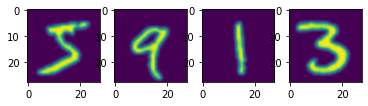

In [20]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [21]:
# X data: 0~1 사이의 값, 3차원 --> 4차원
X_train = X_train.reshape(-1,28,28,1) / 255.
X_test = X_test.reshape(-1,28,28,1) / 255.

In [22]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 학습 및 평가

In [ ]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[checkpoint, early_stop], verbose=1
)

Epoch 1/100
238/240 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9339
Epoch 1: val_loss improved from inf to 0.06214, saving model to best-mnist-cnn.h5
240/240 [==============================] - 13s 16ms/step - loss: 0.2124 - accuracy: 0.9342 - val_loss: 0.0621 - val_accuracy: 0.9818
Epoch 2/100
240/240 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.9814
Epoch 2: val_loss improved from 0.06214 to 0.04356, saving model to best-mnist-cnn.h5
240/240 [==============================] - 4s 15ms/step - loss: 0.0601 - accuracy: 0.9814 - val_loss: 0.0436 - val_accuracy: 0.9874
Epoch 3/100
239/240 [============================>.] - ETA: 0s - loss: 0.0439 - accuracy: 0.9858
Epoch 3: val_loss improved from 0.04356 to 0.03925, saving model to best-mnist-cnn.h5
240/240 [==============================] - 4s 15ms/step - loss: 0.0437 - accuracy: 0.9858 - val_loss: 0.0392 - val_accuracy: 0.9892
Epoch 4/100
240/240 [==============================] - ETA

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9919


[0.028542522341012955, 0.9919000267982483]

- 학습과정 시각화

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

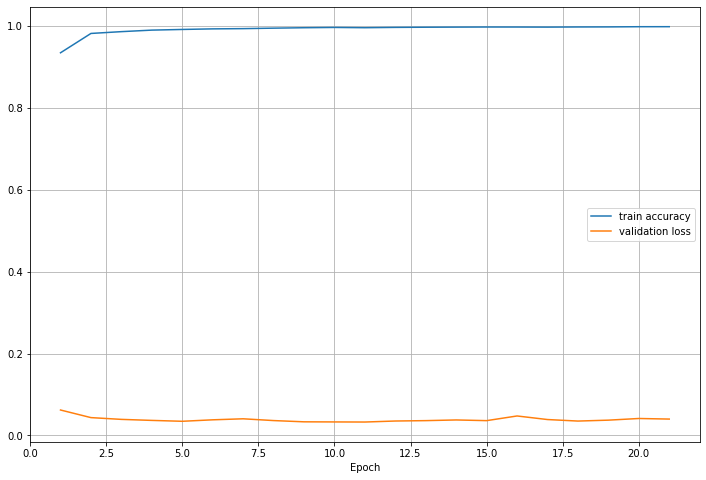

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()